In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in that strange European CSV data, semi-colon separated, with commas for decimal points
aqdf = pd.read_csv("April_sensor_data.csv")

In [3]:
aqdf = aqdf.rename(columns={'Huminity': 'Humidity', 'PM2.5' :'PM25', 'PM10.0':'PM100'})

In [4]:
aqdf.describe()

,NO,PM25,PM100,Temperature,Humidity,TVOC,CO2
count,25920.000000,25920.000000,25920.000000,25919.000000,25919.000000,25919.000000,25919.000000
mean,12960.500000,13.863554,13.872682,20.248779,26.715375,2.026366,4.709173
std,7482.603825,8.075783,7.598230,1.054083,6.867535,0.282825,1.380514
min,1.000000,1.480000,0.000000,18.100000,13.300000,1.100000,1.880000
25%,6480.750000,8.700000,6.587500,19.400000,22.300000,1.840000,3.870000
50%,12960.500000,12.190000,12.380000,20.200000,25.500000,2.010000,4.540000
75%,19440.250000,16.730000,18.570000,20.800000,30.500000,2.160000,5.180000
max,25920.000000,74.570000,61.900000,25.200000,43.400000,6.860000,8.310000


In [5]:
cols = ['PM25', 'PM100', 'Temperature', 'Humidity', 'TVOC','CO2']

C:\Users\Yunhee\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Yunhee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Yunhee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


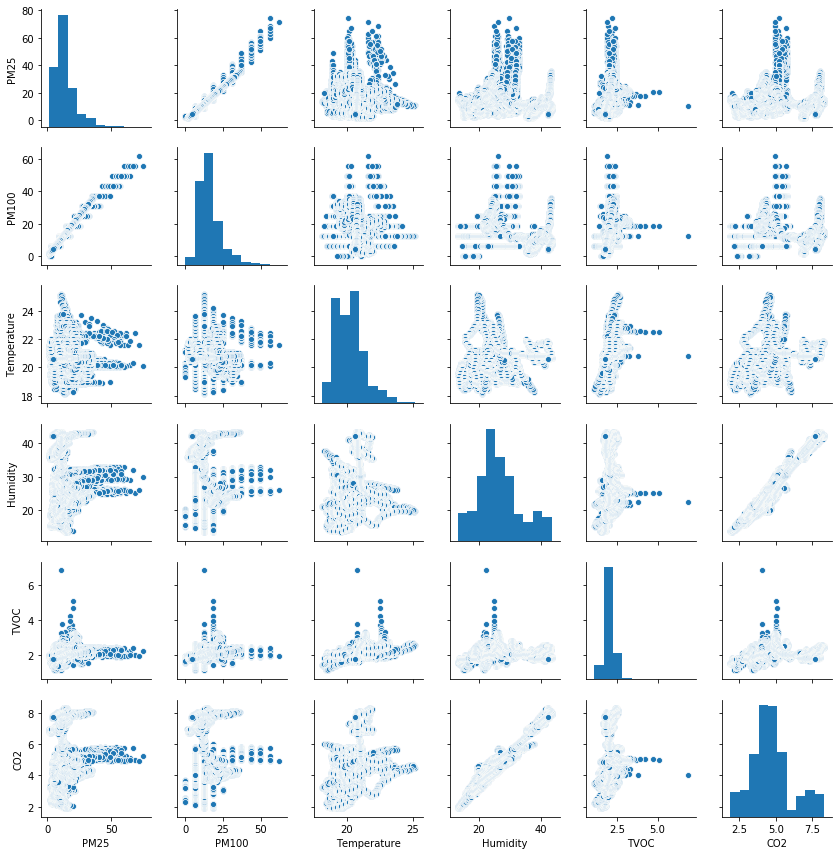

In [6]:
sns.pairplot(aqdf[cols], size=2.0)

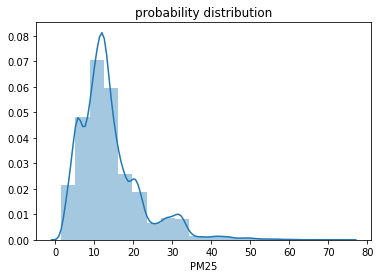

In [7]:
sns.distplot(aqdf['PM25'],bins=20)
plt.title('probability distribution')
plt.show()

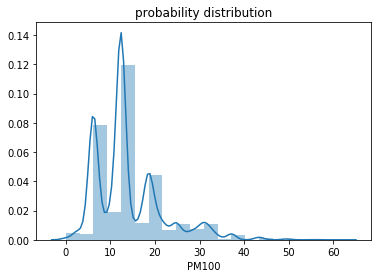

In [8]:
sns.distplot(aqdf['PM100'],bins=20)
plt.title('probability distribution')
plt.show()

In [9]:
cols = ['PM25', 'PM100', 'Temperature', 'Humidity', 'TVOC','CO2']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(aqdf[cols].iloc[:,range(0,6)].values)

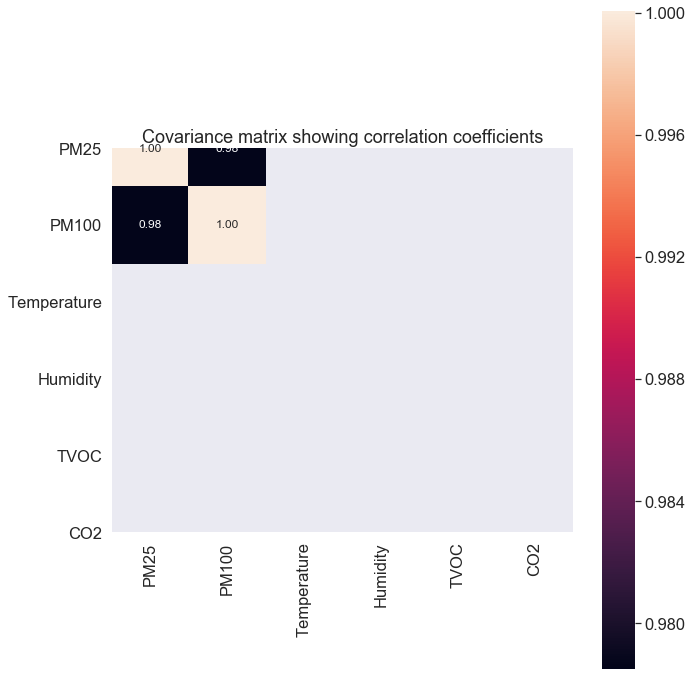

In [10]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [11]:
cols_selected = ['Humidity', 'CO2']

In [12]:
aqdf[cols_selected].head()

,Humidity,CO2
0,22.1,4.16
1,22.1,4.15
2,22.1,4.20
3,22.1,4.17
4,22.1,4.20


In [13]:
X = aqdf[cols_selected].iloc[:,0:1].values    # features matrix 
#X = aqdf[cols_selected]['CO2'].values 
y = aqdf[cols_selected]['Humidity'].values   

In [14]:
X

array([[22.1],
       [22.1],
       [22.1],
       ...,
       [42.3],
       [42.3],
       [42.3]])

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0 ,1])
pd.get_dummies(aqdf[['CO2', 'Humidity']])

,CO2,Humidity
0,4.16,22.1
1,4.15,22.1
2,4.20,22.1
3,4.17,22.1
4,4.20,22.1
5,4.15,22.1
6,4.22,22.2
7,4.18,22.2
8,4.22,22.2
9,4.15,22.2


In [36]:
df2=pd.get_dummies(aqdf[['CO2', 'Humidity']])

In [37]:
df2.dropna(subset=['Humidity'],inplace=True)

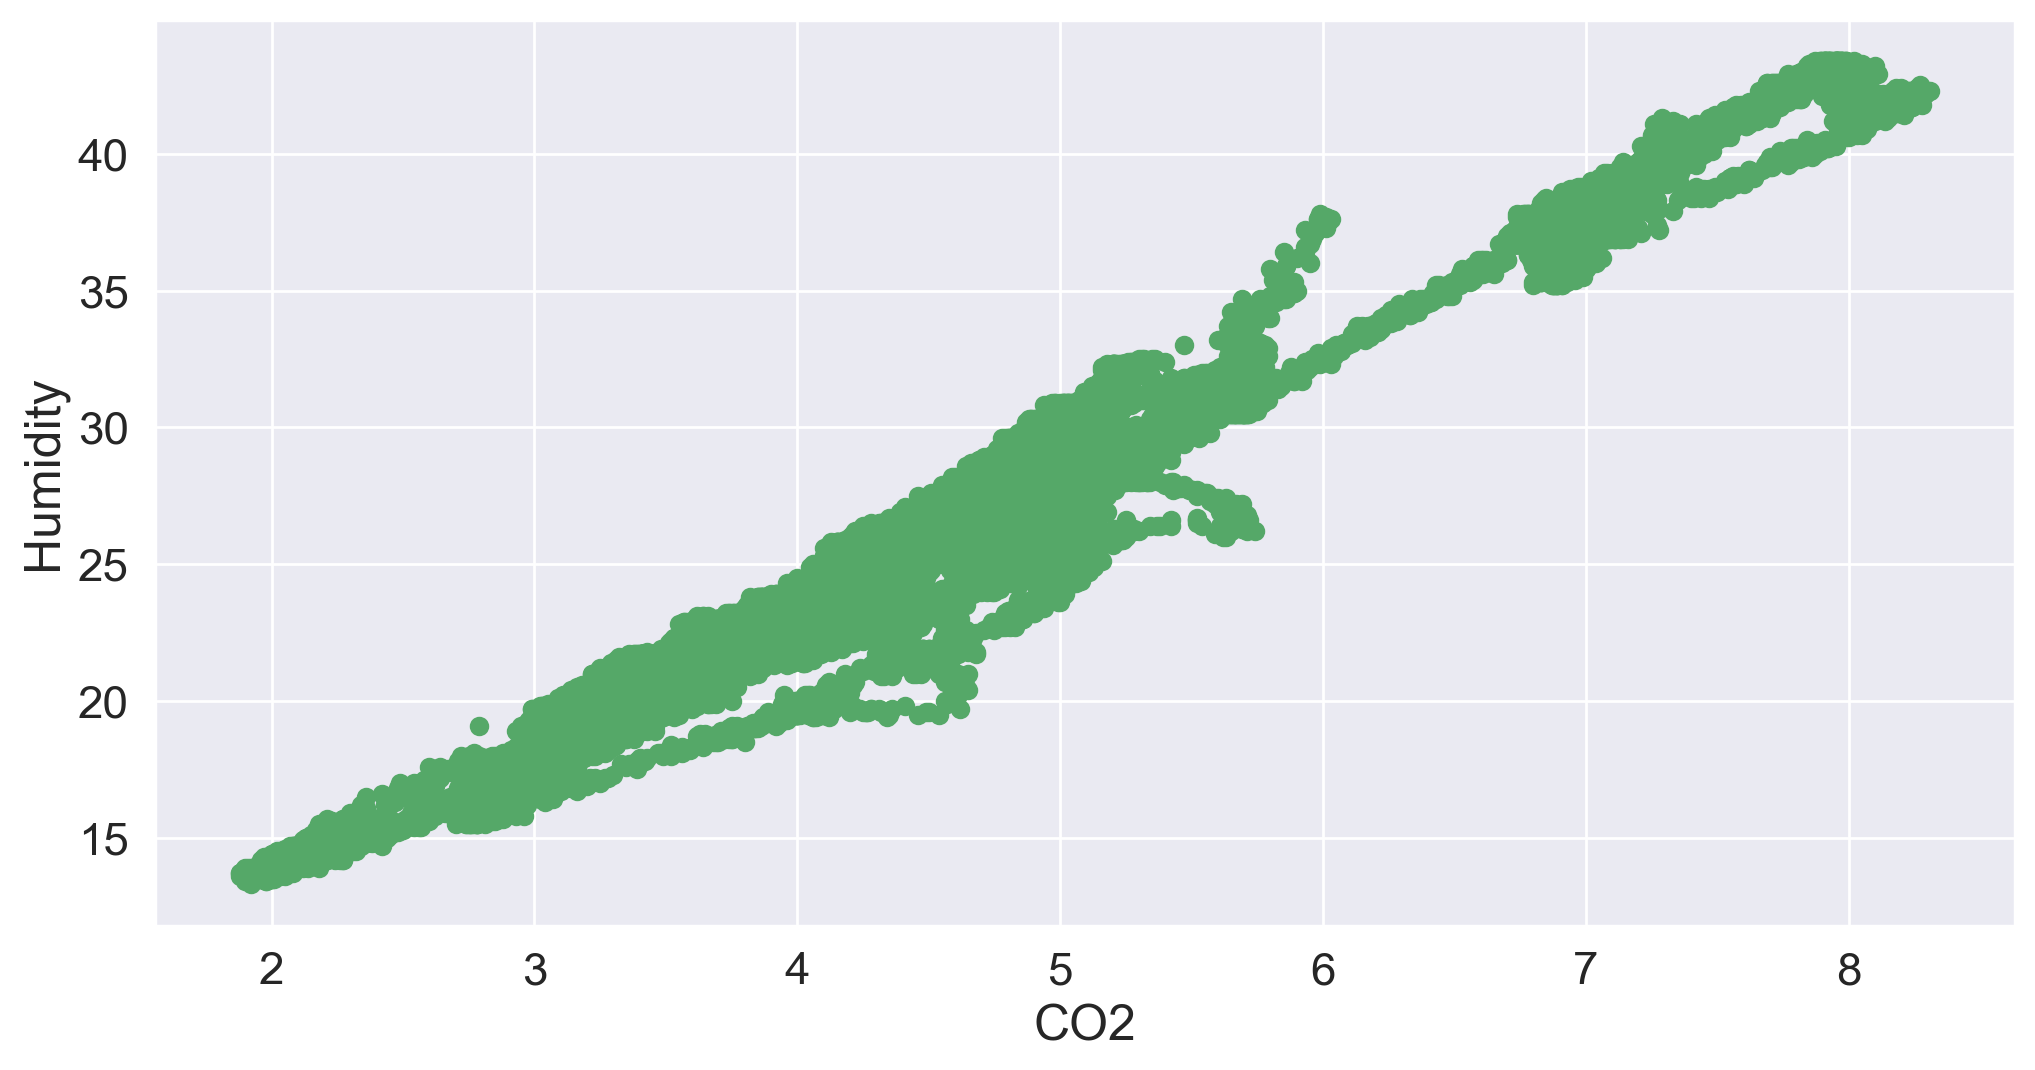

In [38]:
plt.figure(figsize=(12, 6), dpi=200)
plt.scatter(df2['CO2'],df2['Humidity'], color='g')
plt.xlabel('CO2')
plt.ylabel('Humidity')
plt.show()

In [44]:
df2.dropna()

,CO2,Humidity
0,4.16,22.1
1,4.15,22.1
2,4.20,22.1
3,4.17,22.1
4,4.20,22.1
5,4.15,22.1
6,4.22,22.2
7,4.18,22.2
8,4.22,22.2
9,4.15,22.2


In [45]:
from sklearn.model_selection import train_test_split
X = aqdf[cols_selected].iloc[:,0:1].values     
y = aqdf[cols_selected]['Humidity']


In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

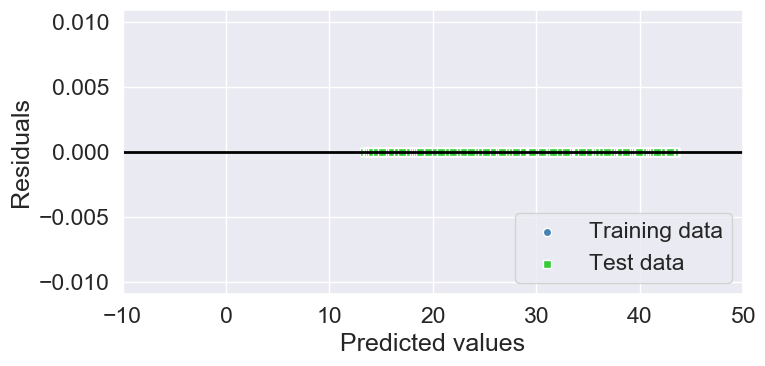

In [53]:
plt.figure(figsize=(8, 4), dpi=100)
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000


In [49]:
slr.fit(X_train, y_train).intercept_

7.105427357601002e-15

In [50]:
slr.fit(X_train, y_train).coef_

array([1.])

In [ ]:
cols_selected = ['PM25', 'PM100']

In [34]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

PM2.5 vs PM10

In [ ]:
aqdf[cols_selected].head()

In [ ]:
X = aqdf[cols_selected].iloc[:,1:2].values    # features matrix 
y = aqdf[cols_selected]['PM25'].values   

In [ ]:
X

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0 ,1])
pd.get_dummies(aqdf[['PM25', 'PM100']])

In [ ]:
df2=pd.get_dummies(aqdf[['PM25', 'PM100']])

In [ ]:
plt.figure(figsize=(12, 6), dpi=200)
plt.scatter(df2['PM25'],df2['PM100'], color='g')
plt.xlabel('PM25')
plt.ylabel('PM100')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = aqdf[cols_selected].iloc[:,0:1].values     
y = aqdf[cols_selected]['PM100']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

In [ ]:
slr.fit(X_train, y_train).intercept_

In [ ]:
slr.fit(X_train, y_train).coef_